### DSC540 Final Project
#### Madison Christiansen

### Milestone 2

In [225]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [226]:
flatfile = pd.read_csv("/Users/madisonchristiansen/Desktop/boxoffice.csv")
flatfile.head()

,rank,title,studio,lifetime_gross,year
0,1,Star Wars: The Force Awakens,BV,936662225,2015
1,2,Avatar,Fox,760507625,2009
2,3,Black Panther,BV,700059566,2018
3,4,Avengers: Infinity War,BV,678681680,2018
4,5,Titanic,Par.,659363944,1997


In [227]:
## column names 
list(flatfile.columns.values)

['rank', 'title', 'studio', 'lifetime_gross', 'year']

In [228]:
# STEP 1
## For step 1 replacing the columns headers with new ones for a more uniform and clean look. 
##Allows for future transformation of the dataset. 

flatfile = flatfile.rename(columns={'rank': 'Rank', 'title': 'Title', 'studio': 'Studio', 'lifetime_gross': 'LifetimeGross', 'year': 'Year'})
flatfile

,Rank,Title,Studio,LifetimeGross,Year
0,1,Star Wars: The Force Awakens,BV,936662225,2015
1,2,Avatar,Fox,760507625,2009
2,3,Black Panther,BV,700059566,2018
3,4,Avengers: Infinity War,BV,678681680,2018
4,5,Titanic,Par.,659363944,1997
...,...,...,...,...,...
15738,15739,Dog Eat Dog,IFC,80,2009
15739,15740,Paranoid Girls,NaN,78,2015
15740,15741,Confession of a Child of the Century,Cohen,74,2015
15741,15742,Storage 24,Magn.,72,2013


In [229]:
# STEP 2
## Checking for duplicates and making sure the data is not repeated. 
## Checking all coloumns, although the most important columns are rank and title. 

print('Rank Column: {}'.format(any(flatfile.duplicated(subset=['Rank']))))
print('Title Column:{}'.format(any(flatfile.duplicated(subset=['Title'])))) 
print('Studio Column:{}'.format(any(flatfile.duplicated(subset=['Studio']))))
print('Lifetime Gross Column:{}'.format(any(flatfile.duplicated(subset=['LifetimeGross']))))
print('Year Column:{}'.format(any(flatfile.duplicated(subset=['Year']))))

Rank Column: False
Title Column:True
Studio Column:True
Lifetime Gross Column:True
Year Column:True


In [230]:
## Title column has duplicates, checking what they are. 
## The duplicates are remakes of the same movie from different years, this will not impact my data. 
## Keeping the duplicates.

title = flatfile["Title"]
flatfile[title.isin(title[title.duplicated()])].sort_values("Title")

,Rank,Title,Studio,LifetimeGross,Year
11962,11963,After Midnight,Avat.,50469,2004
11328,11329,After Midnight,MGM,76325,1989
1959,1960,Around the World in 80 Days,UA,42000000,1956
3045,3046,Around the World in 80 Days,BV,24008137,2004
12556,12557,Bluebeard,Strand,33490,2010
...,...,...,...,...,...
5496,5497,Water,FoxS,5529144,2006
3243,3244,When a Stranger Calls,Col.,21411158,1979
1729,1730,When a Stranger Calls,SGem,47860214,2006
7713,7714,Whore,Trim.,1008404,1991


In [231]:
# STEP 3
## Checking for NaN values. 
## This gives an idea as to if the data is all usable and if there are any rows that are incomplete.

print("Rank Column: ", flatfile['Rank'].isnull().sum())
print("Title Column:", flatfile['Title'].isnull().sum())
print("Studio Column: ", flatfile['Studio'].isnull().sum())
print("Lifetime Gross Column: ", flatfile['LifetimeGross'].isnull().sum())
print("Year Column: ", flatfile['Year'].isnull().sum())

Rank Column:  0
Title Column: 0
Studio Column:  35
Lifetime Gross Column:  0
Year Column:  0


In [232]:
check_for_nan = flatfile['Studio'].isnull()
print (check_for_nan)
## With the nan values being in the studio column only, I think it wont impact the dataset by keeping these rows.
## This will show us what titles have unknown studios and what their data looks like.

0        False
1        False
2        False
3        False
4        False
         ...  
15738    False
15739     True
15740    False
15741    False
15742    False
Name: Studio, Length: 15743, dtype: bool


{'whiskers': [<matplotlib.lines.Line2D at 0x7fbe8a5e0d00>,
 'caps': [<matplotlib.lines.Line2D at 0x7fbe58c47310>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fbe8a5ef0a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fbe58c478b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fbe58c47b80>],
 'means': []}

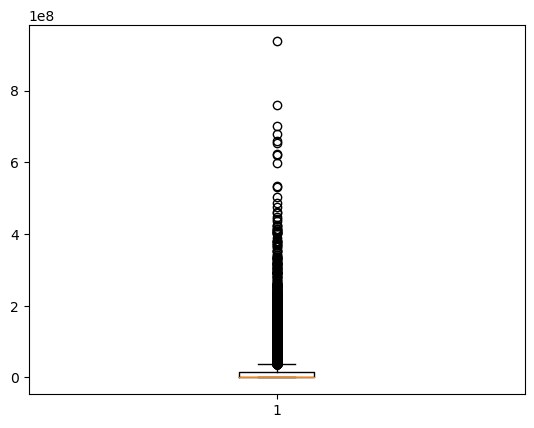

In [233]:
# STEP 4
## Identifying outliers for the different columns.
## Looking at spesifically the lifetime gross and year columns to see if there is bad data within thoes. 

plt.boxplot(flatfile.LifetimeGross)
## The lifetime gross column does not show any significant outliers or bad data. 

{'whiskers': [<matplotlib.lines.Line2D at 0x7fbe2807b910>,
 'caps': [<matplotlib.lines.Line2D at 0x7fbe2807beb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fbe2807b640>],
 'medians': [<matplotlib.lines.Line2D at 0x7fbe2808b490>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fbe2808b760>],
 'means': []}

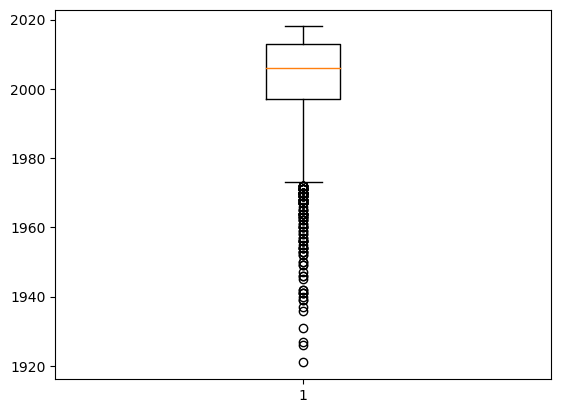

In [234]:
plt.boxplot(flatfile.Year)
## The year column shows outliers although they are not bad data.

In [235]:
# STEP 5 
## Adding a column to label which data is a repeate of the same film from a different year.
def f(flatfile):
    m1 = flatfile.duplicated(['Title'], keep=False)

    flatfile['Duplicate Title'] = np.select([m1],['dup_title'], default='NaD')
    return flatfile

flatfile2 = f(flatfile)

In [236]:
flatfile2 = flatfile2.drop(columns=['DUP'])

KeyError: "['DUP'] not found in axis"

In [237]:
## Checking if it worked
print(flatfile2)
print(flatfile2.loc[[3243]])
print(flatfile2.loc[[1729]])

        Rank                                 Title Studio  LifetimeGross  \
0          1          Star Wars: The Force Awakens     BV      936662225   
1          2                                Avatar    Fox      760507625   
2          3                         Black Panther     BV      700059566   
3          4                Avengers: Infinity War     BV      678681680   
4          5                               Titanic   Par.      659363944   
...      ...                                   ...    ...            ...   
15738  15739                           Dog Eat Dog    IFC             80   
15739  15740                        Paranoid Girls    NaN             78   
15740  15741  Confession of a Child of the Century  Cohen             74   
15741  15742                            Storage 24  Magn.             72   
15742  15743                           Zyzzyx Road   Reg.             30   

       Year Duplicate Title  
0      2015             NaD  
1      2009             NaD

In [238]:
# STEP 6
## Adding a column to indicate which row is missing the studio data. 
## 1=not missing 
## 0=missing
flatfile2['Missing Studio Data'] = (~flatfile2['Studio'].isnull()).astype(int)

In [239]:
flatfile2 = flatfile2.drop(columns=['Missing'])

KeyError: "['Missing'] not found in axis"

In [240]:
flatfile2.head()

,Rank,Title,Studio,LifetimeGross,Year,Duplicate Title,Missing Studio Data
0,1,Star Wars: The Force Awakens,BV,936662225,2015,NaD,1
1,2,Avatar,Fox,760507625,2009,NaD,1
2,3,Black Panther,BV,700059566,2018,NaD,1
3,4,Avengers: Infinity War,BV,678681680,2018,NaD,1
4,5,Titanic,Par.,659363944,1997,NaD,1


### Milestone 3 - Cleaning Website Data

In [241]:
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import requests as r 
import csv

In [242]:
## had to find a new webpage to scrape
response = r.get("https://en.wikipedia.org/wiki/List_of_highest-grossing_films_in_the_United_States_by_year") 
wiki_text = response.text
soup = BeautifulSoup(wiki_text, 'html.parser')

In [243]:
table_soup = soup.find_all('table')
table_soup

[<table class="wikitable sortable" style='width="70%"'>
 <tbody><tr>
 <th>Year
 </th>
 <th>Film
 </th>
 <th>Gross
 </th>
 <th style="text-align:right;">Ref.
 </th></tr>
 <tr>
 <td><a href="/wiki/1977_in_film" title="1977 in film">1977</a>
 </td>
 <td><i><a href="/wiki/Star_Wars_(film)" title="Star Wars (film)">Star Wars</a></i>
 </td>
 <td style="background:#d7ccf3;">$221,280,994
 </td>
 <td style="text-align:center;"><sup class="reference" id="cite_ref-StarWarsBO_2-0"><a href="#cite_note-StarWarsBO-2">[2]</a></sup>
 </td></tr>
 <tr>
 <td><a href="/wiki/1978_in_film" title="1978 in film">1978</a>
 </td>
 <td><i><a href="/wiki/Grease_(film)" title="Grease (film)">Grease</a></i>
 </td>
 <td>$159,978,870
 </td>
 <td style="text-align:center;"><sup class="reference" id="cite_ref-3"><a href="#cite_note-3">[3]</a></sup>
 </td></tr>
 <tr>
 <td><a href="/wiki/1979_in_film" title="1979 in film">1979</a>
 </td>
 <td><i><a href="/wiki/Kramer_vs._Kramer" title="Kramer vs. Kramer">Kramer vs. Kramer

In [244]:
required_table = soup.find("table",  {"class": "wikitable sortable"}) # correct table that needs scraping
print(required_table)

<table class="wikitable sortable" style='width="70%"'>
<tbody><tr>
<th>Year
</th>
<th>Film
</th>
<th>Gross
</th>
<th style="text-align:right;">Ref.
</th></tr>
<tr>
<td><a href="/wiki/1977_in_film" title="1977 in film">1977</a>
</td>
<td><i><a href="/wiki/Star_Wars_(film)" title="Star Wars (film)">Star Wars</a></i>
</td>
<td style="background:#d7ccf3;">$221,280,994
</td>
<td style="text-align:center;"><sup class="reference" id="cite_ref-StarWarsBO_2-0"><a href="#cite_note-StarWarsBO-2">[2]</a></sup>
</td></tr>
<tr>
<td><a href="/wiki/1978_in_film" title="1978 in film">1978</a>
</td>
<td><i><a href="/wiki/Grease_(film)" title="Grease (film)">Grease</a></i>
</td>
<td>$159,978,870
</td>
<td style="text-align:center;"><sup class="reference" id="cite_ref-3"><a href="#cite_note-3">[3]</a></sup>
</td></tr>
<tr>
<td><a href="/wiki/1979_in_film" title="1979 in film">1979</a>
</td>
<td><i><a href="/wiki/Kramer_vs._Kramer" title="Kramer vs. Kramer">Kramer vs. Kramer</a></i>
</td>
<td>$106,260,000


In [245]:
header_tags = required_table.find_all('th') # parsing the columns
headers = [header.text.strip() for header in header_tags]

print(headers)


['Year', 'Film', 'Gross', 'Ref.']


In [246]:
rows = [] # parsing the rows 

data_rows = required_table.find_all('tr')
for row in data_rows:
    value = row.find_all('td')
    beautified_value = [dp.text.strip() for dp in value]
    print(beautified_value)

    if len(beautified_value) ==0:
        continue
        
    rows.append(beautified_value)

[]
['1977', 'Star Wars', '$221,280,994', '[2]']
['1978', 'Grease', '$159,978,870', '[3]']
['1979', 'Kramer vs. Kramer', '$106,260,000', '[4]']
['1980', 'The Empire Strikes Back', '$209,398,025', '[2]']
['1981', 'Raiders of the Lost Ark', '$212,222,025', '[5]']
['1982', 'E.T. the Extra-Terrestrial', '$359,197,037', '[6]']
['1983', 'Return of the Jedi', '$252,583,617', '[7]']
['1984', 'Beverly Hills Cop', '$234,760,478', '[8]']
['1985', 'Back to the Future', '$210,609,762', '[9]']
['1986', 'Top Gun', '$176,781,728', '[10]']
['1987', 'Three Men and a Baby', '$167,780,960', '[11]']
['1988', 'Rain Man', '$172,825,435', '[12]']
['1989', 'Batman', '$251,188,924', '[13]']
['1990', 'Home Alone', '$285,761,243', '[14]']
['1991', 'Terminator 2: Judgment Day', '$204,843,345', '[15]']
['1992', 'Aladdin', '$217,350,219', '[16]']
['1993', 'Jurassic Park', '$357,067,947', '[17]']
['1994', 'Forrest Gump', '$329,694,499', '[18]']
['1995', 'Toy Story', '$191,796,233', '[19]']
['1996', 'Independence Day',

In [247]:
## turning table into a csv file for easier access
with open ('highgrossingfilm.csv', 'w') as output:
    writer = csv.writer(output)
    writer.writerow(headers)
    writer.writerows(rows)

In [248]:
webdf = pd.read_csv('highgrossingfilm.csv')   
webdf

,Year,Film,Gross,Ref.
0,1977,Star Wars,"$221,280,994",[2]
1,1978,Grease,"$159,978,870",[3]
2,1979,Kramer vs. Kramer,"$106,260,000",[4]
3,1980,The Empire Strikes Back,"$209,398,025",[2]
4,1981,Raiders of the Lost Ark,"$212,222,025",[5]
5,1982,E.T. the Extra-Terrestrial,"$359,197,037",[6]
6,1983,Return of the Jedi,"$252,583,617",[7]
7,1984,Beverly Hills Cop,"$234,760,478",[8]
8,1985,Back to the Future,"$210,609,762",[9]
9,1986,Top Gun,"$176,781,728",[10]


In [249]:
# STEP 1
## dropping the ref column - it is not needed for this project.
webdf = webdf.drop('Ref.', axis=1)

In [250]:
# STEP 2 
## Look for duplicates. 

print('Year Column: {}'.format(any(webdf.duplicated(subset=['Year']))))
print('Film Column:{}'.format(any(webdf.duplicated(subset=['Film'])))) 
print('Gross Column:{}'.format(any(webdf.duplicated(subset=['Gross']))))

## No duplicates found - nothing to clean

Year Column: False
Film Column:False
Gross Column:False


In [251]:
# STEP 3
## Checking for NaN values. 

print("Year Column: ", webdf['Year'].isnull().sum())
print("Film Column:", webdf['Film'].isnull().sum())
print("Gross Column: ", webdf['Gross'].isnull().sum())

## No NaN vlaues found - nothing to clean

Year Column:  0
Film Column: 0
Gross Column:  0


In [252]:
# STEP 4
## Grouping the years together in a dataframe to see the average gross. 
avg_gross_by_year = webdf.groupby(['Year','Gross']).mean()

/var/folders/_3/vk2spfgn2zg_41jx6kn0qr3m0000gn/T/ipykernel_54778/3752641768.py:3: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  avg_gross_by_year = webdf.groupby(['Year','Gross']).mean()


{'whiskers': [<matplotlib.lines.Line2D at 0x7fbe58647520>,
 'caps': [<matplotlib.lines.Line2D at 0x7fbe58647ac0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fbe58647250>],
 'medians': [<matplotlib.lines.Line2D at 0x7fbe281620d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fbe281623a0>],
 'means': []}

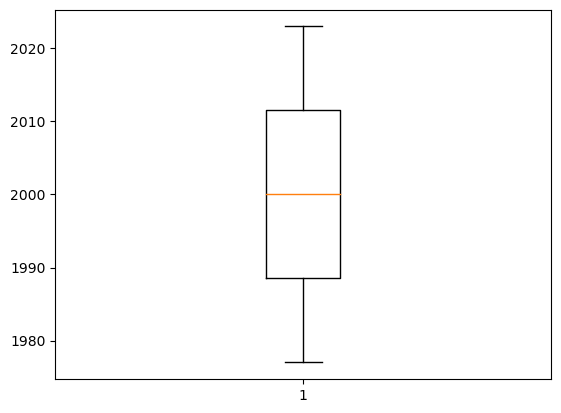

In [253]:
# STEP 5
## Looking to see if their are any year outliers within the data. 
plt.boxplot(webdf.Year)

## No outliers - data is consistant. 

### Ethical Implications - Milestone 2 

#### The studio data for some movie titles is missing, this could cause issues when looking at the next step of combining the datasets together. I dont know if keeping the data with missing values or deleting it is the right idea. Deleting the data can be considered not ethical because it is taking out the data other data of the films that are still important to the whole. 


### Ethical Implications - Milestone 3

#### This dataset pulled from wikipedia had no missing or NaN values, overall it is very clean. This data showed to have no ethical implications to me. The information is well known and gathered in a ethical way, and there is not issue with limited transparency. 

### Milestone 4

In [254]:
import requests
import pandas as pd
import json

## Went with a different API. With the OMDB API I was not able to pull the amount of data needed with the free service. 
api_key = '9b16e06eaf8931bcc31a918ea97671dc' 
url = f'https://api.themoviedb.org/3/discover/movie?api_key={api_key}&language=en-US&sort_by=vote_average.desc&page=1&vote_count.gte=1000'
response = requests.get(url)


In [255]:
data = response.json()
movies = data.get('results', [])

movie_details = [] # list for movie details 


In [256]:
for movie in movies[:500]: 
## for some reason when I put 100 to try and pull 100 movies it only gives me 15, 500 gave me 100 movies 
    movie_id = movie['id'] 
    details_url = f'https://api.themoviedb.org/3/movie/{movie_id}?api_key={api_key}&language=en-US'
    details_response = requests.get(details_url)

## did a if else statment with the status code to make sure the api was working properly 
    if details_response.status_code == 200:
        details_data = details_response.json()

        # details for each movie
        title = details_data['title']
        release_date = details_data['release_date']
        production_companies = [company['name'] for company in details_data['production_companies']]
        gross = details_data.get('revenue', 0)
        votes = details_data.get('vote_count', 0)
        genres = [genre['name'] for genre in details_data['genres']]
        vote_average = details_data.get('vote_average', 0)

        # movie details to list
        movie_details.append({
            'Title': title,
            'Release Date': release_date,
            'Production Companies': production_companies,
            'Gross': gross,
            'Votes': votes,
            'Genres': genres,
                 'Vote Average': vote_average 
        })
    else:
        print(f"Error {movie_id}") # will show error if their is one

In [257]:
# rough data frame
moviedatadf = pd.DataFrame(movie_details)
print(moviedatadf.head())

                         Title Release Date              Production Companies  \
0                The Godfather   1972-03-14   [Paramount, Alfran Productions]   
1     The Shawshank Redemption   1994-09-23       [Castle Rock Entertainment]   
2        The Godfather Part II   1974-12-20  [Paramount, The Coppola Company]   
3  Dilwale Dulhania Le Jayenge   1995-10-19                  [Yash Raj Films]   
4             Schindler's List   1993-12-15            [Amblin Entertainment]   

       Gross  Votes                    Genres  Vote Average  
0  245066411  17943            [Drama, Crime]         8.711  
1   28341469  23782            [Drama, Crime]         8.702  
2  102600000  10831            [Drama, Crime]         8.598  
3  100000000   4131  [Comedy, Drama, Romance]         8.572  
4  321365567  14068     [Drama, History, War]         8.570  


In [284]:
## converting the data frame to a csv for easier use 
moviedatadf.to_csv('movie_data_df.csv', index=False)
apidf = read_csv('movie_data_df.csv')
apidf.head(100)

,Title,Release Date,Production Companies,Gross,Votes,Genres,Vote Average
0,The Godfather,1972-03-14,"['Paramount', 'Alfran Productions']",245066411,17943,"['Drama', 'Crime']",8.711
1,The Shawshank Redemption,1994-09-23,['Castle Rock Entertainment'],28341469,23782,"['Drama', 'Crime']",8.702
2,The Godfather Part II,1974-12-20,"['Paramount', 'The Coppola Company']",102600000,10831,"['Drama', 'Crime']",8.598
3,Dilwale Dulhania Le Jayenge,1995-10-19,['Yash Raj Films'],100000000,4131,"['Comedy', 'Drama', 'Romance']",8.572
4,Schindler's List,1993-12-15,['Amblin Entertainment'],321365567,14068,"['Drama', 'History', 'War']",8.570
5,Spirited Away,2001-07-20,['Studio Ghibli'],274925095,14302,"['Animation', 'Family', 'Fantasy']",8.543
6,12 Angry Men,1957-04-10,"['United Artists', 'Orion-Nova Productions']",1000000,7273,['Drama'],8.500
7,Your Name.,2016-08-26,"['CoMix Wave Films', 'TOHO', 'KADOKAWA', 'East...",357986087,9839,"['Romance', 'Animation', 'Drama']",8.522
8,Parasite,2019-05-30,['Barunson E&A'],257591776,15734,"['Comedy', 'Thriller', 'Drama']",8.516
9,The Dark Knight,2008-07-14,"['DC Comics', 'Legendary Pictures', 'Syncopy',...",1004558444,29715,"['Drama', 'Action', 'Crime', 'Thriller']",8.510


In [292]:
## STEP 1 - Keeping only the first value from each list in the genres column, second and third the subgenres not needed. 
apidf['Genres'] = apidf['Genres'].str.strip("['").str.split("', '").str[0]

In [295]:
## STEP 2 - Keeping only the first value from the production comp column - the sub comapany not needed.
apidf['Production Companies'] = apidf['Production Companies'].str.strip("['").str.split("', '").str[0].str.rstrip("']")

In [297]:
## STEP 3 - extract the year only from the date column
apidf['Release Date'] = pd.to_datetime(apidf['Release Date']).dt.year.astype(str)

In [299]:
## STEP 4 - Change the date column name to Year - better align with other dfs.
apidf2 = apidf.rename(columns={"Release Date": "Year"})

In [302]:
apidf2.head(11)

,Title,Year,Production Companies,Gross,Votes,Genres,Vote Average
0,The Godfather,1972,Paramount,245066411,17943,Drama,8.711
1,The Shawshank Redemption,1994,Castle Rock Entertainment,28341469,23782,Drama,8.702
2,The Godfather Part II,1974,Paramount,102600000,10831,Drama,8.598
3,Dilwale Dulhania Le Jayenge,1995,Yash Raj Films,100000000,4131,Comedy,8.572
4,Schindler's List,1993,Amblin Entertainment,321365567,14068,Drama,8.570
5,Spirited Away,2001,Studio Ghibli,274925095,14302,Animation,8.543
6,12 Angry Men,1957,United Artists,1000000,7273,Drama'],8.500
7,Your Name.,2016,CoMix Wave Films,357986087,9839,Romance,8.522
8,Parasite,2019,Barunson E&A,257591776,15734,Comedy,8.516
9,The Dark Knight,2008,DC Comics,1004558444,29715,Drama,8.510


In [304]:
## STEP 5 - checking for duplicates - focusing on title 
print('Title Column:{}'.format(any(apidf2.duplicated(subset=['Title'])))) 
print('Gross Column:{}'.format(any(apidf2.duplicated(subset=['Gross']))))
print('Vote Average Column:{}'.format(any(apidf2.duplicated(subset=['Vote Average']))))

## Checks out - no duplicates. 

Title Column:False
Gross Column:False
Vote Average Column:False


In [305]:
## STEP 6 - Checking for NaN values. 

print("Title Column:", apidf2['Title'].isnull().sum())
print("Production Companies Column: ", apidf2['Production Companies'].isnull().sum())
print("Gross Column: ", apidf2['Gross'].isnull().sum())
print("Year Column: ", apidf2['Year'].isnull().sum())
print("Votes Column: ", apidf2['Votes'].isnull().sum())
print("Genres Column: ", apidf2['Genres'].isnull().sum())
print("Vote Average Column: ", apidf2['Vote Average'].isnull().sum())

## Checks out - no NaN values. 

Title Column: 0
Production Companies Column:  0
Gross Column:  0
Year Column:  0
Votes Column:  0
Genres Column:  0
Vote Average Column:  0


{'whiskers': [<matplotlib.lines.Line2D at 0x7fbe586b54c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fbe586b5a60>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fbe586b51f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fbe586c0040>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fbe586c0310>],
 'means': []}

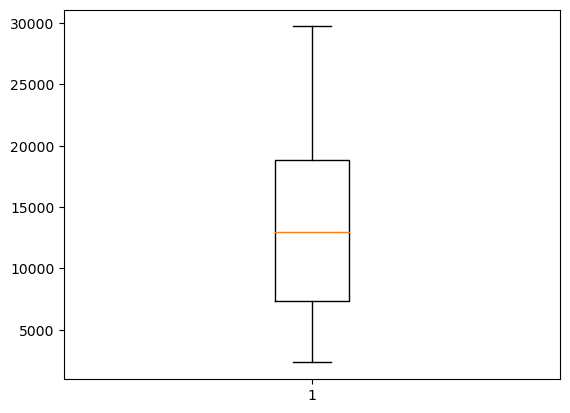

In [306]:
# STEP 7 - Looking to see if their are any year outliers within the votes, this could throw the averages off if so
plt.boxplot(apidf2.Votes)

## No outliers - data is consistant.

### Ethical Implications - Milestone 4
### The only ethical implications that could arise is when deleting the subdata that was in the producation company and genres columns. Although the first value in the list was the main genre and company, make the other values sub. Deleting the sub data makes for future analysis and a easier understanding when later combining the data with the other data frames. 